Disclaimer: ChatGPT and Claude were used in the making of the code for this assignment. A customGPT, Consensus, was also used to source the *Film Quartley* article by Jack Lewis.
______________

In [169]:
import pandas as pd
import plotly.express as px
import folium
from IPython.display import display
import json
import copy
import plotly.io as pio
import plotly.offline as pyo
pio.renderers.default = "jupyterlab"
pyo.init_notebook_mode(connected=True)

import numpy as np

In [142]:
radio_1939_df= pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1940.csv')
radio_1950_df= pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1950.csv')

<div align="center">
  <img
    src="../assets/img/radio-tuning-bw.tif"
    width="60%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    (Source: LOC.gov) Woman tuning a radio, ca. 1925.
  </figcaption>
</div>


### Introduction 

The U.S is historically known to have the big three corporations of entertainment: CBS, NBC, and ABC. These companies have transformed into new conglomerates because of respective mergers with Viacom, Comcast, and Disney. I'm a fiend for reality television produced by these media companies (#RupaulsDragRaceOnMTV). Today mass media companies primarily focus on film and TV, but the big three originally created their corporate empires through radio broadcasting and buying radio stations.

Expanding radio stations networks and frequent infighting between stations for frequencies forced federal government intervention. Regulation of Radio in United States began with the Federal Radio Commission in the 1920s. The 1934 Communications Act replaced the radio commission with an expanded Federal Communications Commission. This act mandated an annual report on the state of the industry and statistical data of radio in America.

Historical scholarship of radio emphasizes the corporate nature of broadcast radio. One aspect of scholarly writing focuses on the rise of commercialism and the many genres of radio programs from 1930-1950. New genres of shows were created such as soap opera *Ma Perkins*. Radio programs increasingly had sponsors taking up airtime for advertisements, highlighting another commercial aspect of radio listening. As a result, [showmanship and personality](https://youtu.be/5P2yTfJ7nGI?feature=shared) of commercial radio announcers was key, so listeners wouldn't get bored.

Another source, a 2020 book on the worldwide history of radio, argues colleges and educational institutions have significantly contributed to American radio. In 1920 The first college radio station popped up at Union College in Upstate New York. But outside of college campuses, many areas lacked the kind of educational broadcasting found at colleges, like expert-hosted shows on agriculture, foreign affairs, and current events. 

Most people from 1930-1950 got their news from radio programming produced by the big three radio networks. By 1950, the big three had a national network of affiliate radio stations and were expanding to color television. My initial focus for this project was on the corporations behind radio. But as the data taken from the FCC's annual report on radio stations by state was visualized, it showed unexpected trends in radio station distribution in different regions of the United States.

### Methodology/Data

The dataset was created using historical data from the [1939](https://www.fcc.gov/reports-research/reports/annual-reports-congress/5th-annual-report-congress-1939) and the [1950](https://www.fcc.gov/reports-research/reports/annual-reports-congress/16th-annual-report-congress-1950) FCC annual reports to Congress. Two Generative AI applications, Claude and ChatGPT, were used to create tabular data measuring FCC-authorized radio stations by state. 

My process was to screenshot the statistical tables in the reports so ChatGPT could transcribe them into a comma separated values spreadsheet. The programming language Python was then used to analyze the spreadsheets without risking integrity of the original spreadsheet. Python has many libraries containing pre-written commands and functions to save time for writing your own functions that execute code. These are imported at the top using the "import" command. One library I utilized, Pandas, reads spreadsheets and creates a more mutable tabular data structure known as a dataframe. This helped me manipulate the data and conduct data analysis through the coding notebook JupyterLab. 

Pandas dataframes were then made listing the amount of FCC-authorized radio stations by state. Then I used Python to merge state-level Census data from 1940 and 1950 into the two dataframes. This was so I could conduct a per-capita analysis of radio station data. Finally, I used three other coding libraries for my data visualizations. Folium and Plotly were utilized for respectively creating choropleth maps and bar charts. The Numerical Python (NumPy) library was used to create quantile-classifications for the choropleth maps. Quantile classification is the concept of dividing numbers in a dataset into equal-sized intervals. This helped to show more nuance of the color scale for the per-capita choropleth maps. All the datasets and coding notebooks are available on the project's [GitHub](https://github.com/christianr2d212/research-project) repository. 

<div align="center">
  <img
    src="../assets/img/fcc_table.jpeg"
    width="80%"
    style="border: 2px solid"
    alt="Description of image"
  />
  <figcaption style="font-style: italic">
    What the dataset from 1939 originally looks like in the FCC Report
  </figcaption>
</div>



For context, some radio stations were mandated to be on specific frequencies during night-time or day-time blocs. This was to prevent radio signal interference and so stations wouldn't compete for frequencies. That data eventually stopped being measured by 1950, with the commissioners of the FCC report opting to measure total state broadcast stations and listing the amount of AM, FM, Educational and TV Stations. As a result, a new column had to be calculated in the 1950 dataframe listing the total number of radio stations, subtracting TV stations from the total column. For comparision I also included a couple rows from dataframe of the 1939 FCC radio data.


In [58]:
radio_1950_df.sample(3)

#the code to create the column was this:
#radio_1950_df['total_stations']= radio_1950_df['Total']-radio_1950_df['TV']

,state,AM,FM_Commercial,FM_Educational,TV,Total,population,total_stations,stations_per_100k
28,New Jersey,20,13,2,1,36,4835329,35,0.723839
15,Kentucky,43,12,3,2,60,2944806,58,1.969569
33,Ohio,69,45,6,12,132,7946627,120,1.510075


In [11]:
radio_1939_df.sample(3)

,state,total_stations,population,stations_per_100k
40,Rhode Island,6,713346,0.841107
10,Georgia,14,3123723,0.448183
30,New Jersey,11,4160165,0.264413


### Mapping Trends in Radio Data
To begin the analysis for this project, I started with a choropleth map of the raw totals of radio stations by state. The raw total maps have a diverging color scale, as the data of total radios by state seemed to have lots of middling values that weren't given much visibility. Thanks to a diverging color scheme like Spectral, the outliers with a high amount of radio stations due to their high population is given more unique colors. However, the raw totals do not seem to highlight a change over time that is worthwhile.

Below is the code used to make my choropleth maps. The first block of code establishes a Python function to make the maps. This is so all the maps could be uniform in their starting zoomed-out scale, opacity, and tooltips. The first two lines read in the map of U.S states used for the visualization. But the third line with all the variable names (df, value_column, legend, colormap, bins) also allow the maps to have differences in datasets visualized. They also tell Python what data column to visualize and what to title the map under the key. The last two variables in the third line of code are related to the colorscale of the chorpleth. Colormap determines the theme of the choropleth's colorscale, while the bins are for refining the colorscale's breakpoints.  The choropleth map is temporarily stored in variable called chor, so the code block in #4) can add tooltips to the Folium map. Finally, the last line of code displays the map.

In [144]:

# Load US states GeoJSON
with open('../data/processed/us-states.json') as f:
    states_geo = json.load(f)

def make_choropleth(df, value_column, legend, colormap='YlGnBu', bins=None):
    """
    df            : DataFrame with 'state' + value_column
    value_column  : name of column to visualize
    legend        : legend title (string)
    colormap      : str, any valid Folium/Brewer color scale (e.g., 'Spectral', 'YlGnBu')
    bins          : list of numeric break-points for your color scale
    """
    # 1) Deep‐copy GeoJSON and merge in your data values
    geojson_copy = copy.deepcopy(states_geo)
    for feat in geojson_copy['features']:
        state = feat['properties']['name']
        match = df.loc[df['state'] == state, value_column]
        feat['properties'][value_column] = float(match.values[0]) if not match.empty else None

    # 2) Initialize map
    m = folium.Map(location=[37.8, -96], zoom_start=1.5)

    # 3) Add choropleth layer, passing bins (threshold_scale)
    chor = folium.Choropleth(
        geo_data=geojson_copy,
        data=df,
        columns=['state', value_column],
        key_on='feature.properties.name',
        fill_color=colormap,
        threshold_scale=bins,
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=legend,
        reset=True
    ).add_to(m)

    # 4) Attach hover tooltip for state + value
    chor.geojson.add_child(
        folium.features.GeoJsonTooltip(
            fields=['name', value_column],
            aliases=['State:', legend + ':'],
            localize=True,
            sticky=True
        )
    )

    # 5) Display the map inline
    display(m)


Once the above function is initalized, then the function can be called by it's name, make_choropleth, and can be adjusted through the previously mentioned variables. So in this first function call I ask it to use the dataframe of 1939 FCC radio data to visualize the column of [totat_stations], with the title under the legend as "Total Stations (1939). Then I assign the colormap to a theme that is supported by Folium. My preferred theme for visualizing these raw totals is Spectral, it provides some nice unique colors to distinguish outliers and middling values.

In [171]:

make_choropleth(
    radio_1939_df, 
    value_column='total_stations', 
    legend='Total Stations (1939)', 
    colormap='Spectral')


Below I called the again function to remake and visualize the choropleth map, passing on the 1950 radio dataframe, telling the function it needs to visualize the 1950 dataframe's total stations column and to once again use the Spectral color scheme.

In [178]:

make_choropleth(
    radio_1950_df,
    'total_stations',
    'Total Stations (1950)',
    colormap='Spectral'
)

The 1950 choropleth map shows virtually little difference. Texas, California, and New York are among the states with the highest stations for both maps. The Middle Atlantic states of New Jersey, Delaware, and Maryland are shown to have abysmal totals, a sign that context is missing for the mapping of the datasets. This is the drawback to collecting raw totals on a state level is it ignores the context that radio signals travel across state lines. For example, a person living in Newark, New Jersey is likely to listen to radio stations located across the Hudson River in New York City. 


In order to see if there were trends in access to radio station across the United States, I then began analyzing the number of radio stations per 100,000 people in each state. The consequence to this choice was I had to exclude FCC data on radio in U.S territories like the Virgin Islands and Puerto Rico because they were not included in the U.S Census. For the purpose of analysis, these territories had to be excluded.

Taking the total number of radio stations and dividing it by each state's population to show per-capita rates paints a fuller picture of radio broadcasting. From there a couple of patterns emerge, such as unusually higher per-capita rates in the Rocky Mountain region. Alaska in 1939 is shown to have the highest radio stations per-capita of any state, at a whopping rate of 4.1. 

In order to show a more granular view of per-capita radio stations, especially among southern states, the per-capita choropleth maps use quantile classification schema. Below are the numpy functions and pre-written methods the methodology section mentioned. It first takes the dataframe's radio stations per capita column and calls the quantile breakpoint function. It's then stored as a "bin" in a list variable and passed into the make_choropleth function again to generate the per-capita choropleth.

In [146]:
#    Map C: Stations per 100k in 1939
import numpy as np
qs = radio_1939_df['stations_per_100k'].quantile([0,.2,.4,.6,.8,1])
quantile_bins = list(qs)
print("Quantile breakpoints:", quantile_bins)
make_choropleth(
                radio_1939_df,
                value_column='stations_per_100k',
                legend='Stations per 100k (1939)',
                colormap='YlGnBu',
                bins=quantile_bins
               )


Quantile breakpoints: [0.2139889956159004, 0.4215938719358925, 0.5370464232257387, 0.7263658021993604, 1.182800254421222, 4.136561689923336]


In [148]:
#    Map D: Stations per 100k in 1950
# 2) Compute the 0%, 20%, 40%, 60%, 80%, 100% quantiles
qs = radio_1950_df['stations_per_100k'].quantile([0, .2, .4, .6, .8, 1.0])
quantile_bins = qs.tolist()
print("Quantile breakpoints:", quantile_bins)

# 3) Call your choropleth function with these bins
make_choropleth(
    radio_1950_df,
    value_column='stations_per_100k',
    legend='Radio Stations per 100k (1950)',
    colormap='YlGnBu',
    bins=quantile_bins
)


Quantile breakpoints: [0.7238390603824476, 1.8177227094033332, 2.1885060883857226, 2.5104349328886246, 3.1550412022926935, 7.773450556967732]


Strangely enough, the Western states overall had the highest radio stations per 100,000 people. Despite this more in-depth look at radio stations in relation to population, the state-by-state aggregation of these choropleth leave more questions than answers.

Looking at the change of states like California from about 10 years shows the number of radio stations they had per 100,000 people actually went down. This could've been for a variety of reasons, such as increased immigration to California outpaced radio station growth. But it's not like anyone was moving to isolated, mountainous area such as Montana and Alaska. Another form of context, one that groups radio stations by regions instead of states, is needed.

### Rocky Mountain Radio Council and The Rise of Educational Radio

The visualization of radio data on a state classification comes with inherent flaws in analyzing the data. To remedy this, plotly bar charts were made aggregating the number of radio stations according the Region divisions classified by the Census Bureau. The Python code below creating the first bar chart of per-capita radio stations gives a good overview of what states comprise each region. 


In [165]:
print(df1940.columns)

Index(['state', 'total_stations', 'population', 'stations_per_100k',
       'division'],
      dtype='object')


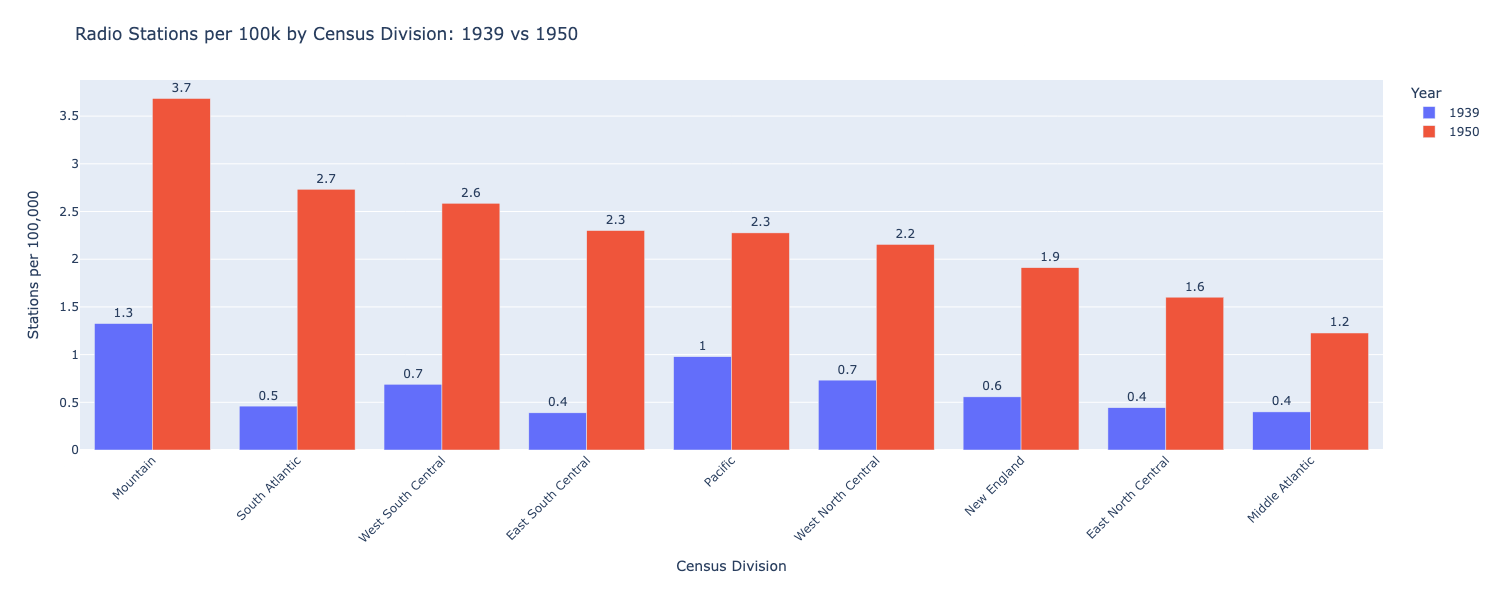

In [167]:
import pandas as pd
import plotly.express as px

# 1) Division map (same as before)
division_map = {
    'Connecticut':'New England','Maine':'New England','Massachusetts':'New England',
    'New Hampshire':'New England','Rhode Island':'New England','Vermont':'New England',
    'New York':'Middle Atlantic','New Jersey':'Middle Atlantic','Pennsylvania':'Middle Atlantic',
    'Illinois':'East North Central','Indiana':'East North Central','Michigan':'East North Central',
    'Ohio':'East North Central','Wisconsin':'East North Central',
    'Iowa':'West North Central','Kansas':'West North Central','Minnesota':'West North Central',
    'Missouri':'West North Central','Nebraska':'West North Central',
    'North Dakota':'West North Central','South Dakota':'West North Central',
    'Delaware':'South Atlantic','Florida':'South Atlantic','Georgia':'South Atlantic',
    'Maryland':'South Atlantic','North Carolina':'South Atlantic',
    'South Carolina':'South Atlantic','Virginia':'South Atlantic',
    'West Virginia':'South Atlantic','District of Columbia':'South Atlantic',
    'Alabama':'East South Central','Kentucky':'East South Central',
    'Mississippi':'East South Central','Tennessee':'East South Central',
    'Arkansas':'West South Central','Louisiana':'West South Central',
    'Oklahoma':'West South Central','Texas':'West South Central',
    'Arizona':'Mountain','Colorado':'Mountain','Idaho':'Mountain','Montana':'Mountain',
    'Nevada':'Mountain','New Mexico':'Mountain','Utah':'Mountain','Wyoming':'Mountain',
    'Alaska':'Pacific','California':'Pacific','Hawaii':'Pacific',
    'Oregon':'Pacific','Washington':'Pacific'
}

# 2) Load data
df1940 = pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1940.csv')
df1950 = pd.read_csv('../data/processed/correct_dtypes_merged_fcc_census_1950.csv')

def summarize_by_division(df, year):
    df = df.copy()
    df['division'] = df['state'].map(division_map)
    agg = (
        df.groupby('division', as_index=False)
          .agg(total_stations=('total_stations','sum'),
               population=('population','sum'))
    )
    agg['stations_per_100k'] = agg['total_stations']/agg['population']*100_000
    agg['year'] = str(year)
    return agg

sum39 = summarize_by_division(df1940, 1939)
sum50 = summarize_by_division(df1950, 1950)
combined = pd.concat([sum39, sum50], ignore_index=True)

# 3) Compute ordering by 1950 descending
order_1950 = (
    sum50.sort_values('stations_per_100k', ascending=False)
         ['division']
         .tolist()
)

# 4) Plot with category order
fig = px.bar(
    combined,
    x='division',
    y='stations_per_100k',
    color='year',
    barmode='group',
    text=combined['stations_per_100k'].round(1),
    category_orders={'division': order_1950},
    title='Radio Stations per 100k by Census Division: 1939 vs 1950',
    labels={
        'division':'Census Division',
        'stations_per_100k':'Stations per 100,000',
        'year':'Year'
    },
    height=600
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin={'b':150,'t':80}
)

fig.show()

Some secondary research touches on how radio stations would even broadcast across international borders. In the early 1930s a popular radio show based out of station in Kansas was hosted by alternative medicine doctor John R. Brinkley. Brinkley became a "border blaster" and shifted broadcasting his show from Mexico after the Federal Radio Commission revoked his station's license. The reason was he advocated for the transplantation of goat glands into humans to cure male impotence (Bathgate, 90). So I hope this story highlights why it felt important to visualize this data through grouping of regions, rather than the more arbitrary U.S state borders. 

Here, the data visualization echoes the fact that the Mountain States region had an unusually high amount of radio stations for their populous, despite the region being extremely rural outside of a couple of population centers like Denver.

The reason for this was education. In the 1940s the Rocky Mountain Radio Council was formed out of multiple governmental and civic organizations. Member insitutions of the council primarily consisted of organizations in Wyoming and Colorado, but the Radio Council ended up filling huge gaps in radio programming throughout the Rocky Mountain region. Many radio stations in states like Montana were isolated and rural. They had no network facilities to create their own radio shows, meaning Mountain region stations would often have to ask for more programs than it was possible to supply. That is until the Rocky Mountain Radio Council was formed. The goal of this experimental council was to reduce isolation for these rural residents in mountain states.

Through their member institutions the Council would go to rural-area radio stations and offer them educational programs. For example the Colorado Agricultural College (now CSU) produced a weekly agricultural informational program complete with professional actors, a gigantic orchestra, and a folk song singer. The University of Colorado basically had a round-table discussion podcast called *History in the Making*. This was a unique program where CU Boulder faculty from multiple fields were brought in to discuss a selected topic and create a rough script on the spot.

The Radio Council shows were largely experimental but had great successes. According to Lewis, the council had a policy to not scare the majority of its audience by announcing at the beginning of their broadcasts that they were going to present an educational program. Other innovations included experimenting with new broadcast techniques like creating realistic sound effects with props (Foley art) and the intention of producing good shows similar to the personality and theatricality of network radio. All of this helped to captivate audiences in the Rocky Mountains, and  likely why radio stations in the Rockies were so common compared to other regions. From 1939 to 1950, the number of radio stations per 100,000 people in the region almost tripled, going from 1.3 to 4.7. This would not have been possible without the geographic isolation of the region from the U.S and the programming pushed forward by the Rocky Mountain Radio Council.



### Conclusion

This project highlighted how raw totals of data, like radio stations by states, do not paint a full picture and often need more context. Texas in 1950 had 216 total radio stations, the most stations out of any other state. But the caveat to this is data can lie by not telling a complete story. For example, Alaska in 1950 had a per-capita rate of 7.7 stations per 100,000 people just by having a low population of about 77,000 serviced by three radio stations. As a communication technology the airwaves connected isolated communities by bringing information, music, and entertainment to places as far as Alaska and Hawaii. By doing this, it unified U.S States and created the baseline for a national popular culture. Thanks to radio networks, a resident of Missoula, Montana, received information, such as a presidential speech, simultaneously with someone in Washington, D.C. Information exchange increasingly became faster after radio, culminating in today's landscape of social networks and streaming services powered by the Internet.

In the Rocky Mountain region, a collective effort comprised of government, civic, and educational institutions from Colorado and Wyoming created effective educational radio programs that captivated listeners. Radio council shows experimented with a diverse range of techniques, taking inspiration from techniques developed by commercial broadcasters. The per-capita data of radio availablity in the Mountain States region remained strong throughout the 1940s as the Council transformed educational programming and connected isolated rural mountain communities with broadcasting. 

### Bibliography
___

Bathgate, Gordon. 2020. [*Radio Broadcasting : A History of the Airwaves*.](https://research-ebsco-com.aurarialibrary.idm.oclc.org/linkprocessor/plink?id=943694ee-d2af-3a33-ad05-779ed32f1e33)
Barnsley: Pen & Sword History.

Craig, Steve. "'the More they Listen, the More they Buy': Radio and the Modernizing of Rural America, 1930-1939." Agricultural History 80, no. 1 (2006): 1-16.

Federal Communications Commission. 1939. “5th Annual Report to Congress (1939).” Congressional Report 5. Washington D.C.

Federal Communications Commission. 1950. “15th Annual Report of the FCC (1950).” Congressional Report 16. Washington D.C.

Lewis, Jack Weir. “Educational Radio Rides the Range.” Hollywood Quarterly 1, no. 3 (1946): 312–16. https://doi.org/10.2307/1209288.


MacDonald, J. Fred. 1982. [*Don’t Touch That Dial! Radio Programming in American Life, 1920 - 1960*](https://www.worldradiohistory.com/BOOKSHELF-ARH/Radio-Programming/Radio-Programming/Don't-Touch-That-Dial-MacDonald-1979.pdf). Repr. Chicago, Ill: Nelson-Hall.

